# Module 3 Lesson 2

_This demonstration is meant to be used in parallel with the course content. To make full use of this, have both open and when you get to an example graph in the lesson, find the corresponding code here and play around with the numbers and variables to see how it changes things._

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, fftfreq

pi = 3.1415

# Frequency domain signal

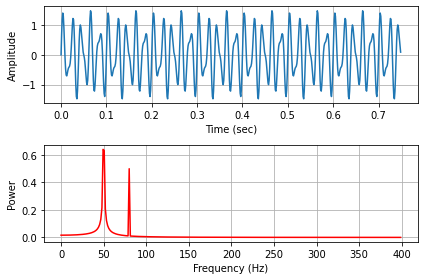

In [ ]:
N = 600
T = 1.0 / 800.0

x = np.linspace(0.0, N*T, N, endpoint=False)

y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

yf = fft(y)
xf = fftfreq(N, T)[:N//2]

fig, ax = plt.subplots(2,1)

ax[0].plot(x, y)
ax[1].plot(xf, 2.0/N * np.abs(yf[0:N//2]), 'r-')

ax[0].set_xlabel("Time (sec)")
ax[1].set_xlabel("Frequency (Hz)")

ax[0].set_ylabel("Amplitude")
ax[1].set_ylabel("Power")

ax[0].grid()
ax[1].grid()
plt.tight_layout()
plt.show()

# Noise filtering

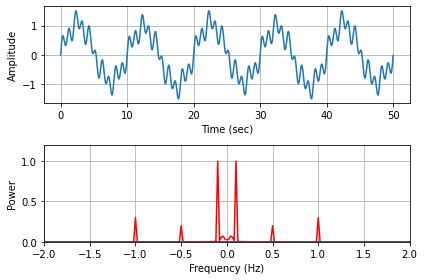

In [ ]:
x = np.arange(0,50,0.01)
y = np.sin(0.1 * 2.0*np.pi * x)

noise = 0.2 * np.sin(0.5 * 2.0*np.pi * x) + 0.1 * np.sin(0.05 * 2.0*np.pi * x) + 0.3 * np.sin(1 * 2.0*np.pi * x)

yf = fft(y + noise)
xf = fftfreq(int(50/0.01), 0.01)

fig, ax = plt.subplots(2,1)
ax[0].plot(x, y + noise)
ax[1].plot(xf, 2 * (0.01/50) * np.abs(yf), 'r-')

ax[0].set_xlabel("Time (sec)")
ax[1].set_xlabel("Frequency (Hz)")

ax[0].set_ylabel("Amplitude")
ax[1].set_ylabel("Power")

ax[1].set_xlim(-2, 2)
ax[1].set_ylim(0, 1.2)

ax[0].grid()
ax[1].grid()
plt.tight_layout()
plt.show()

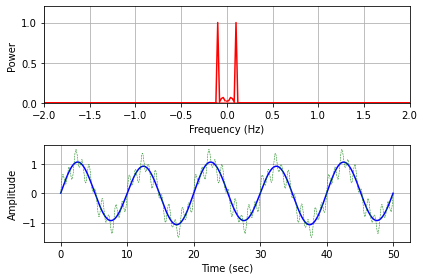

In [ ]:
from scipy.fft import ifft

yf_filtered = yf
yf_filtered[(xf > 0.3)] = 0
yf_filtered[(xf < -0.3)] = 0

y_filtered = ifft(yf_filtered).real

fig, ax = plt.subplots(2,1)
ax[0].plot(xf,  2 * (0.01/50) * np.abs(yf_filtered), 'r-')
ax[1].plot(x, y_filtered, 'b-')
ax[1].plot(x, y + noise, 'g--', linewidth=0.5)

ax[1].set_xlabel("Time (sec)")
ax[0].set_xlabel("Frequency (Hz)")

ax[1].set_ylabel("Amplitude")
ax[0].set_ylabel("Power")

ax[0].set_xlim(-2, 2)
ax[0].set_ylim(0, 1.2)

ax[0].grid()
ax[1].grid()
plt.tight_layout()
plt.show()